In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

df = pd.read_csv('diabetes.csv')
print(df.isna().sum()) #No NaN values
print((df == 0).sum()) #Several 0 values, this data is important, fill with the median

#df.shape 768 Rows, 9 Columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [2]:
columns_replace= ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI'] #These columns should never have 0

for column in columns_replace: #values in these column could not be zero we need to remove those
    df[column] = df[column].replace(0,np.NaN)

for column in columns_replace :
   mean= int(df[column].mean(skipna=True))
   df[column] = df[column].replace(np.NaN,mean)
print((df == 0).sum()) #cleaned up

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [3]:
###Feature Vectorization
print(df.info()) #All data is already numerical or encoded properly

print(df.describe().T) #Data has varying scales, we need to normalize it

X, y = df.iloc[:,:-1], df.iloc[:, -1]

# Scale the input features
X_normal = StandardScaler().fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.682292  30.435999  44.000   99.75000   
Bloo

In [4]:
### Outlier Check:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination=0.05).fit(X_normal)

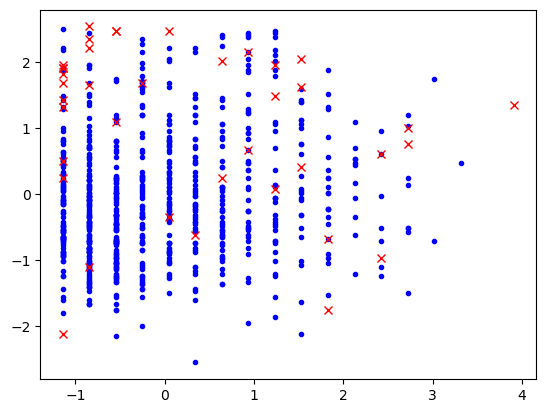

In [5]:
predictions = iforest.predict(X_normal)
# Plot the normal points
plt.plot(X_normal[predictions == 1][:, 0], X_normal[predictions == 1][:, 1], 'b.')

# Plot the anomalous points
plt.plot(X_normal[predictions == -1][:, 0], X_normal[predictions == -1][:, 1], 'rx')

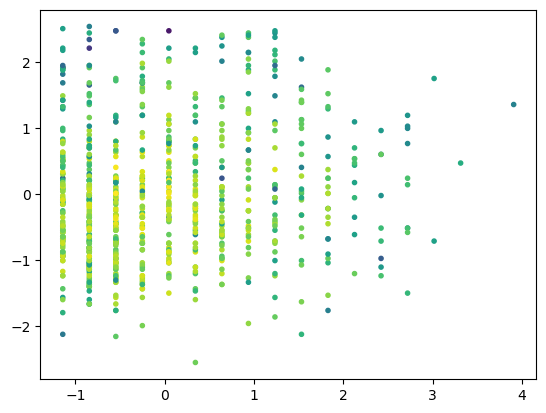

In [6]:
plt.scatter(X_normal[:, 0], X_normal[:, 1], c=iforest.decision_function(X_normal), marker='.')

In [7]:
dfo = pd.DataFrame(dict(predicted_label=iforest.predict(X_normal), score=iforest.decision_function(X_normal)))
outliers = dfo[dfo['predicted_label'] == -1].values
inliers = dfo[dfo['predicted_label'] == 1].head(len(outliers)).values
pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.116174,-1.0,-0.052602
1,1.0,0.137971,-1.0,-0.066481
2,1.0,0.073398,-1.0,-0.099699
3,1.0,0.135087,-1.0,-0.001531
4,1.0,0.145130,-1.0,-0.007983
5,1.0,0.103457,-1.0,-0.042124
6,1.0,0.105348,-1.0,-0.008682
7,1.0,0.092158,-1.0,-0.010495
8,1.0,0.129553,-1.0,-0.016345
9,1.0,0.086381,-1.0,-0.011072


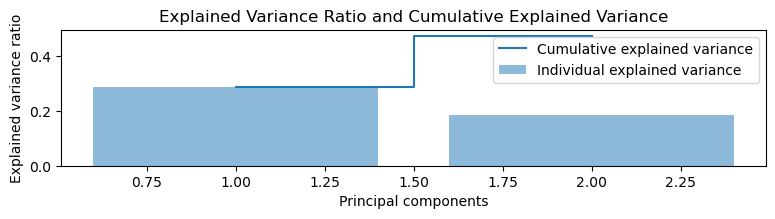

Number of components to explain 95% of the variance: 1


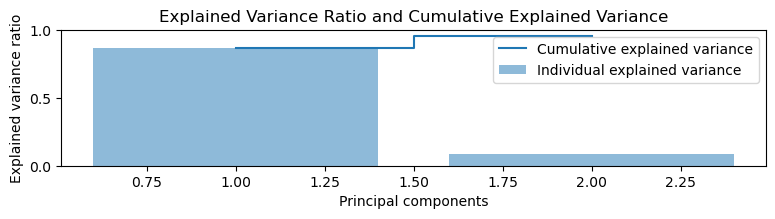

Number of components to explain 95% of the variance: 2


In [8]:
pca_normalized = PCA(n_components=2).fit(X_normal)
pca_raw = PCA(n_components=2).fit(X)

for i, pca in [(1, pca_normalized), (3, pca_raw)]:

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot explained variance ratio
    plt.figure(figsize=(20, 6))
    plt.subplot(3, 2, i)
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Explained Variance Ratio and Cumulative Explained Variance')
    plt.show()

    # Determine the number of components to explain 95% of the variance
    n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
    print(f'Number of components to explain 95% of the variance: {n_components}')

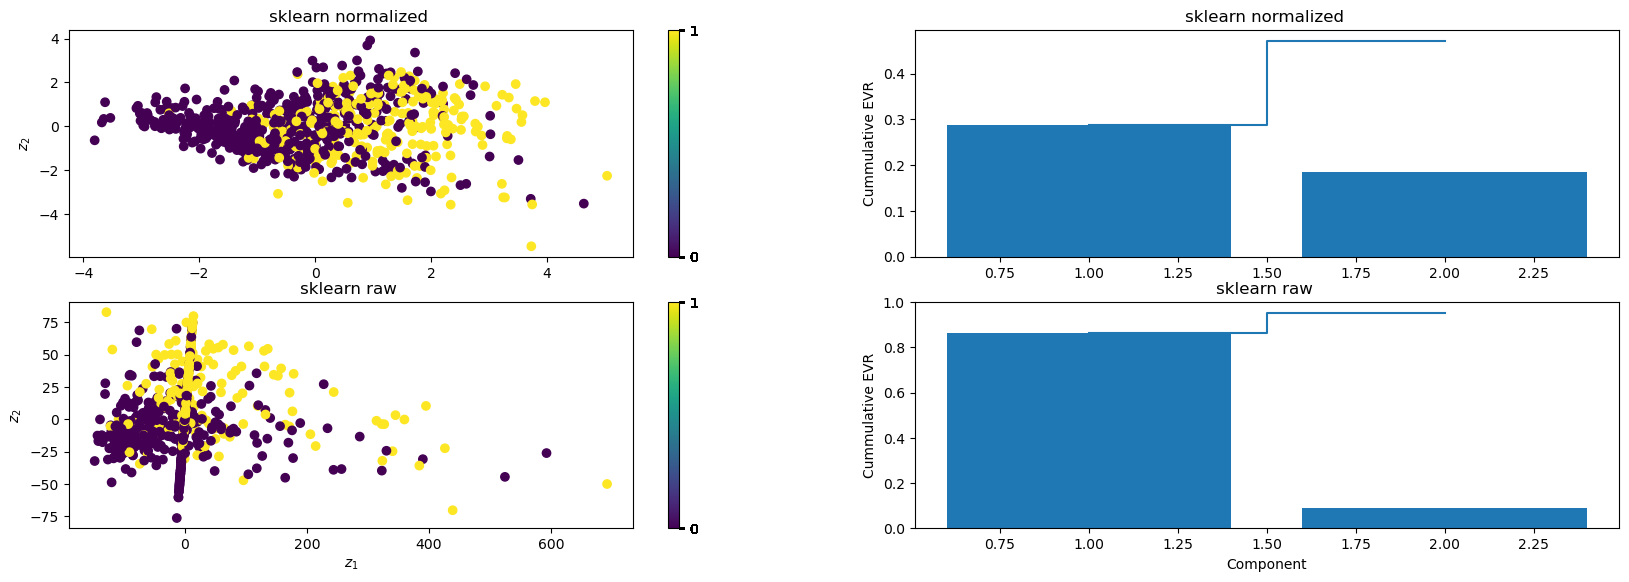

In [9]:
fig = plt.figure(figsize=(20, 10))

for i, pca, title in [(1, pca_normalized, "sklearn normalized "), 
                      (3, pca_raw, "sklearn raw ")]:
    X_projected = pca.transform(X_normal if i < 3 else X)

    plt.subplot(3, 2, i)
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
    cb = plt.colorbar()
    cb.set_ticks(y)
    if i != 1: plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(title)

    expl_var = pca.explained_variance_ratio_
    cum_expl_var = np.cumsum(expl_var)

    plt.subplot(3, 2, i + 1)
    plt.bar(range(1, len(expl_var) + 1), expl_var, align='center')
    plt.ylabel('EVR')
    if i != 1: plt.xlabel('Component')

    plt.step(range(1, len(cum_expl_var) + 1), cum_expl_var, where='mid')
    plt.ylabel("Cummulative EVR")
    if i != 1: plt.xlabel('Component')
    plt.title(title)

In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(np.cov(X_normal.T))
loadings = eigen_vecs * np.sqrt(eigen_vals)

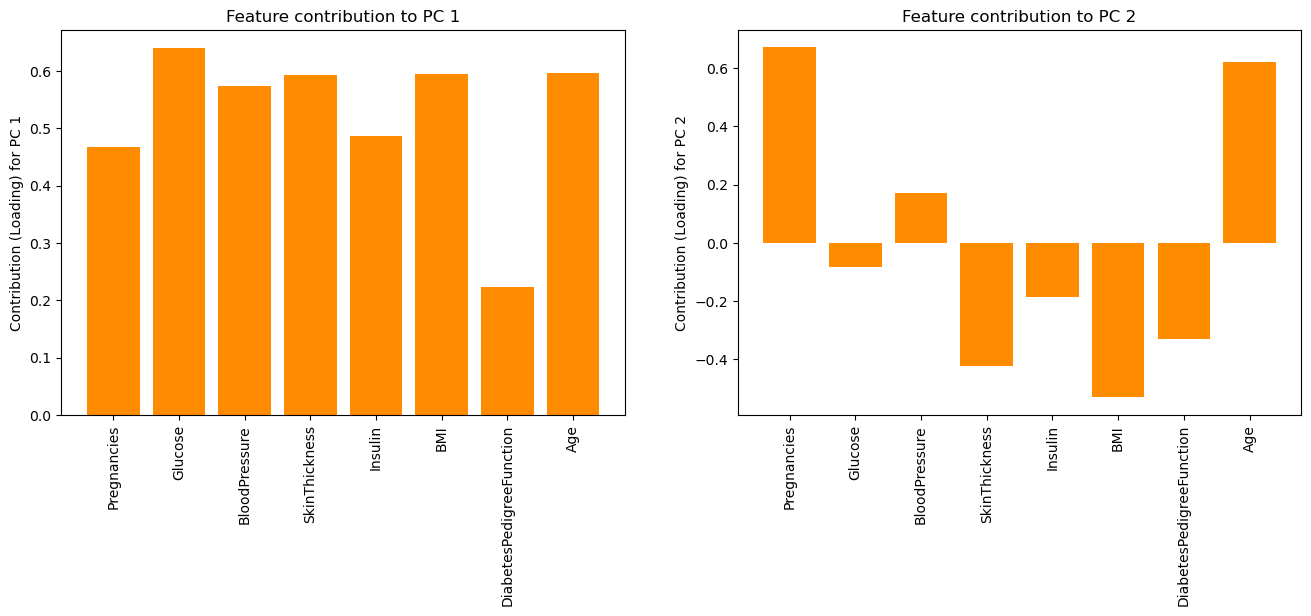

In [11]:
fig = plt.figure(figsize=(16, 5))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.bar(range(X_normal.shape[1]), loadings[:, i], align='center', color="darkorange")
    plt.ylabel(f"Contribution (Loading) for PC {i + 1}")
    plt.xticks(range(8), labels=df.columns[:-1], rotation=90)
    plt.title(f"Feature contribution to PC {i + 1}")

Text(0, 0.5, '$z_2$')

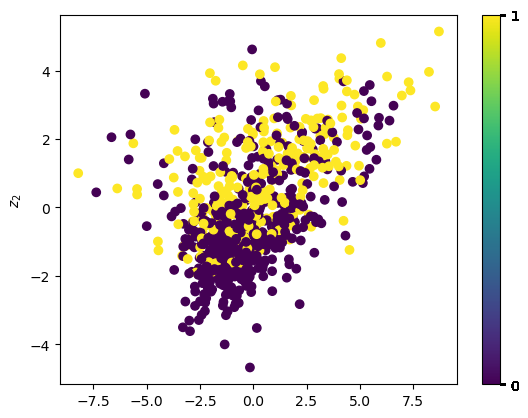

In [12]:
from sklearn.random_projection import GaussianRandomProjection

r_pca = GaussianRandomProjection(n_components=2, eps=0.01)
X_projected = r_pca.fit_transform(X_normal)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
cb = plt.colorbar()
cb.set_ticks(y)
if i != 1: plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

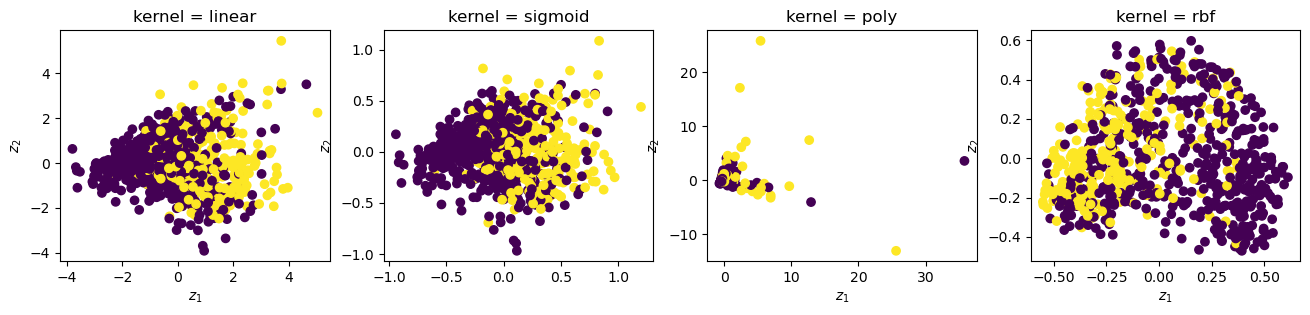

In [13]:
from sklearn.decomposition import KernelPCA
fig = plt.figure(figsize=(16, 3))

for i, k in enumerate(["linear", "sigmoid", "poly", "rbf"]):
    plt.subplot(1,4, i + 1)
    k_pca = KernelPCA(n_components=2, kernel=k)
    X_projected = k_pca.fit_transform(X_normal)
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
    # cb = plt.colorbar()
    # cb.set_ticks(y)
    if i != 1: plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(f"kernel = {k}")

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding

X_pca = pca_normalized.transform(X_normal)

tsne = TSNE(n_components=2, learning_rate='auto', perplexity=30, init='random')
X_tsne = tsne.fit_transform(X_normal)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_normal)

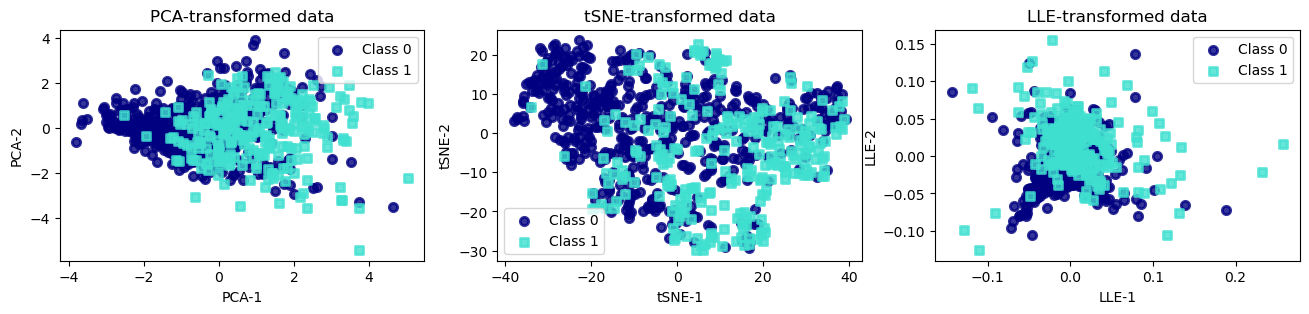

In [15]:
fig = plt.figure(figsize=(16, 3))

colors = ["navy", "turquoise", "darkorange"]
markers = ['o', 's', '^']

for i, name, X in [ (1, "PCA", X_pca), (2, "tSNE", X_tsne), (3, "LLE", X_lle)]:
    plt.subplot(1,3, i)
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y == l, 0], X[y == l, 1], lw=2, c=c, alpha=0.8, label=f"Class {l}", marker=m)

    plt.legend(loc="best")
    plt.xlabel(f"{name}-1")
    plt.ylabel(f"{name}-2")
    plt.title(f"{name}-transformed data")

In [16]:
from sklearn.mixture import GaussianMixture
K = np.arange(2, 21)
models = [ GaussianMixture(k).fit(X_pca) for k in K ]

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmea

Text(0.5, 1.0, 'Using the silhouette score')

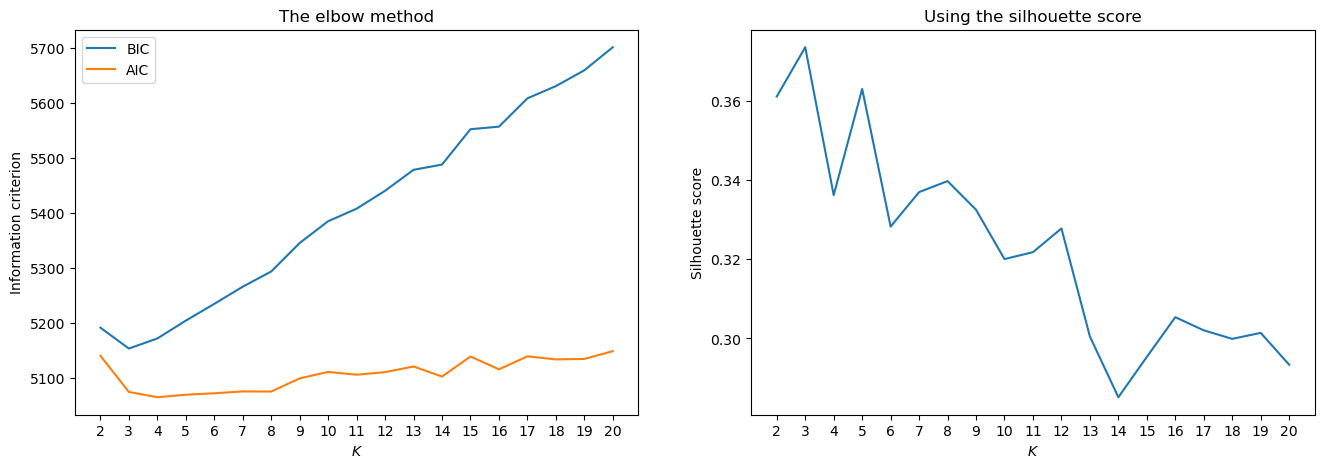

In [17]:
from sklearn.metrics import silhouette_score
fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(K, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(K, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('$K$')
plt.xticks(K)
plt.ylabel('Information criterion')
# plt.grid()
plt.title("The elbow method")

plt.subplot(1, 2, 2)
plt.plot(K, [silhouette_score(X_pca, m.predict(X_pca)) for m in models])
plt.xlabel('$K$')
plt.xticks(K)
plt.ylabel('Silhouette score')
# plt.grid()
plt.title("Using the silhouette score")

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


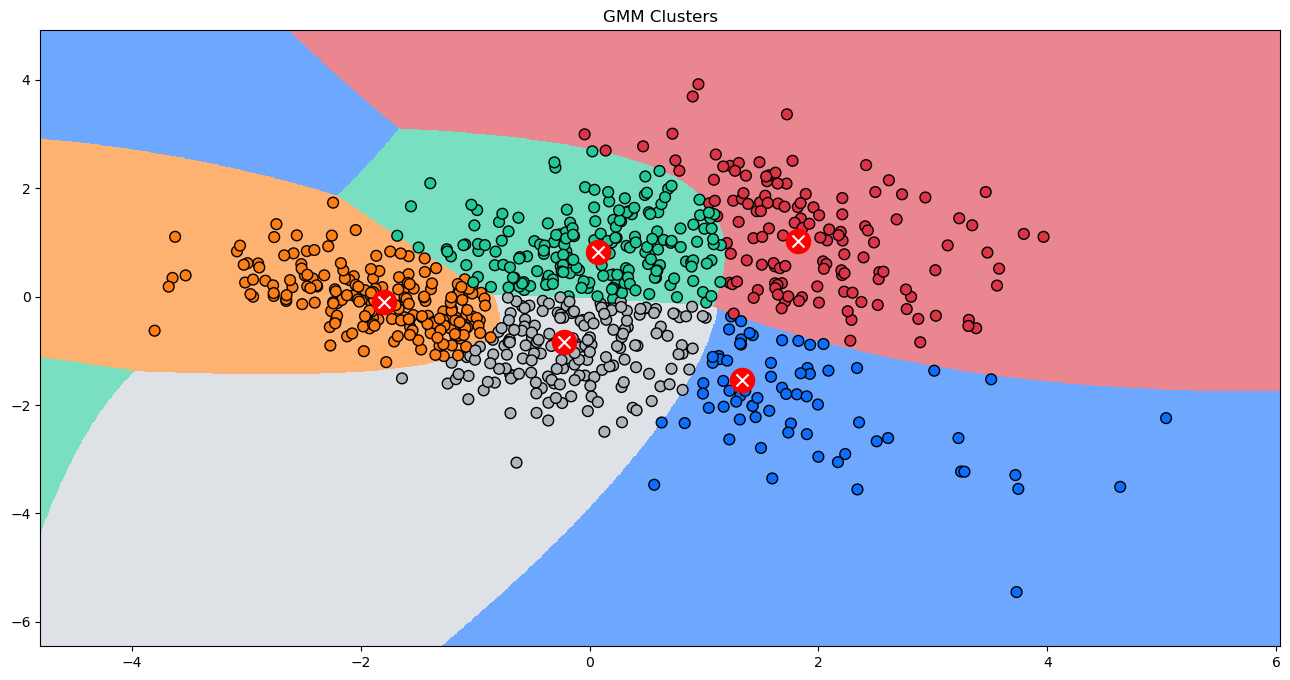

In [19]:
import mylib as my
gmm = GaussianMixture(n_components=5).fit(X_pca)

my.plot_decision_regions(X_pca, gmm.predict(X_pca).reshape(len(X_pca), 1), gmm, resolution=0.01, title="GMM Clusters")
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o', s=300, facecolors='red', edgecolors='r', color='r')
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c="w", marker="x", s=75)

In [25]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print("GaussianMixture:", normalized_mutual_info_score(y, gmm.predict(X_pca)))

GaussianMixture: 0.1030160540209945
